In [1]:
!pip install scikit-learn==1.4.2

Import The Required Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import datetime
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

Read the Csv Files

In [3]:
df_1 = pd.read_csv("/content/drive/MyDrive/singapore files/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/singapore files/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/singapore files/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/singapore files/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/singapore files/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [4]:
print(df_1.info(), df_2.info(), df_3.info(), df_4.info(), df_5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 

Change the Remaining Lease Type

In [5]:
df_5["remaining_lease"] = df_5["remaining_lease"].str.split(' ').str[0].astype(int)

Combine all the datasets

In [6]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929577 entries, 0 to 929576
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929577 non-null  object 
 1   town                 929577 non-null  object 
 2   flat_type            929577 non-null  object 
 3   block                929577 non-null  object 
 4   street_name          929577 non-null  object 
 5   storey_range         929577 non-null  object 
 6   floor_area_sqm       929577 non-null  float64
 7   flat_model           929577 non-null  object 
 8   lease_commence_date  929577 non-null  int64  
 9   resale_price         929577 non-null  float64
 10  remaining_lease      220527 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.0+ MB


In [8]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
929572,2024-07,YISHUN,5 ROOM,297,YISHUN ST 20,01 TO 03,112.0,Improved,2000,615000.0,75.0
929573,2024-07,YISHUN,5 ROOM,755,YISHUN ST 72,04 TO 06,122.0,Improved,1986,670000.0,61.0
929574,2024-07,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,148.0,Maisonette,1988,830800.0,63.0
929575,2024-07,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,147.0,Apartment,1987,820000.0,62.0


Splitting Columns & Changing Types

In [9]:
df[["year", "month"]] = df["month"].str.split('-', expand = True)
df["block"] = df["block"].str.split(r'(\D)', expand = True)[0].astype('int64')
df[["storey_start", "storey_end"]] = df["storey_range"].str.split('TO', expand = True)
df["month"] = pd.to_numeric(df["month"])
df["year"] = pd.to_numeric(df["year"])
df["floor_area_sqm"] = pd.to_numeric(df["floor_area_sqm"])
df["resale_price"] = pd.to_numeric(df["resale_price"])
df["storey_start"] = pd.to_numeric(df["storey_start"])
df["storey_end"] = pd.to_numeric(df["storey_end"])
df.drop(columns = "storey_range", inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929577 entries, 0 to 929576
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929577 non-null  int64  
 1   town                 929577 non-null  object 
 2   flat_type            929577 non-null  object 
 3   block                929577 non-null  int64  
 4   street_name          929577 non-null  object 
 5   floor_area_sqm       929577 non-null  float64
 6   flat_model           929577 non-null  object 
 7   lease_commence_date  929577 non-null  int64  
 8   resale_price         929577 non-null  float64
 9   remaining_lease      220527 non-null  float64
 10  year                 929577 non-null  int64  
 11  storey_start         929577 non-null  int64  
 12  storey_end           929577 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.2+ MB


Check For Null Values

In [11]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

Replace Null Values

In [12]:
df["remaining_lease"].fillna(99-(df["year"]-df["lease_commence_date"]), inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929577 entries, 0 to 929576
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929577 non-null  int64  
 1   town                 929577 non-null  object 
 2   flat_type            929577 non-null  object 
 3   block                929577 non-null  int64  
 4   street_name          929577 non-null  object 
 5   floor_area_sqm       929577 non-null  float64
 6   flat_model           929577 non-null  object 
 7   lease_commence_date  929577 non-null  int64  
 8   resale_price         929577 non-null  float64
 9   remaining_lease      929577 non-null  float64
 10  year                 929577 non-null  int64  
 11  storey_start         929577 non-null  int64  
 12  storey_end           929577 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.2+ MB


Convert the String Type

In [14]:
df["flat_model"] = df["flat_model"].str.upper()

Adding New Features To The Dataset

In [15]:
df["price_per_sqm"] = df["resale_price"]/df["floor_area_sqm"]
df["years_holding"] = df["year"] - df["lease_commence_date"]
current_year = datetime.datetime.now().year
df["current_remaining_lease"] = df["remaining_lease"] - (current_year - df["year"])
df["age_of_property"] = current_year-df["lease_commence_date"]

In [16]:
df

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,47
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,47
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,47
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,47
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929572,7,YISHUN,5 ROOM,297,YISHUN ST 20,112.0,IMPROVED,2000,615000.0,75.0,2024,1,3,5491.071429,24,75.0,24
929573,7,YISHUN,5 ROOM,755,YISHUN ST 72,122.0,IMPROVED,1986,670000.0,61.0,2024,4,6,5491.803279,38,61.0,38
929574,7,YISHUN,EXECUTIVE,406,YISHUN AVE 6,148.0,MAISONETTE,1988,830800.0,63.0,2024,4,6,5613.513514,36,63.0,36
929575,7,YISHUN,EXECUTIVE,792,YISHUN RING RD,147.0,APARTMENT,1987,820000.0,62.0,2024,7,9,5578.231293,37,62.0,37


Statistics

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,929577.0,6.549675,3.409227,1.000000,4.000000,7.000000,10.000000,1.200000e+01
block,929577.0,348.809442,255.130925,1.000000,127.000000,302.000000,534.000000,9.990000e+02
floor_area_sqm,929577.0,95.690607,25.821311,28.000000,73.000000,93.000000,113.000000,3.070000e+02
lease_commence_date,929577.0,1988.301333,10.688866,1966.000000,1981.000000,1986.000000,1996.000000,2.020000e+03
resale_price,929577.0,321528.500191,171177.531855,5000.000000,193800.000000,298000.000000,418000.000000,1.588000e+06
remaining_lease,929577.0,80.983602,10.810250,41.000000,74.000000,83.000000,90.000000,1.010000e+02
year,929577.0,2006.214893,9.352759,1990.000000,1999.000000,2005.000000,2014.000000,2.024000e+03
storey_start,929577.0,6.685370,4.825148,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,929577.0,8.700082,4.825133,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,929577.0,3325.528742,1539.979830,161.290323,2293.577982,2961.165049,4211.538462,1.559140e+04


Function For Plotting Graphs

In [18]:
def charts(df, col1, col2):
  for col1, col2 in zip(col1, col2):
    fig, axis = plt.subplots(1,2,figsize = (15,5))
    sns.histplot(data = df, x = col2, kde=True, bins=20, ax=axis[0], color="purple")
    axis[0].set_title(f"{col2} before log transformation")
    sns.boxplot(data = df, y = col2, ax=axis[1], showfliers=True)
    axis[1].set_title(f"{col2} before outliers handle")
    plt.tight_layout()
    plt.show()

Skewness handle

In [19]:
df["floor_area_sqm_log"]=np.log(df["floor_area_sqm"])
df["resale_price_log"]=np.log(df["resale_price"])
df["remaining_lease_log"]=np.log(df["remaining_lease"])
df["price_per_sqm_log"]=np.log(df["price_per_sqm"])

Outliers handle

In [20]:
def outlier(df, column):
  iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
  upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
  lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
  df[column] = df[column].clip(lower_threshold, upper_threshold)

In [21]:
outlier(df, "floor_area_sqm_log")
outlier(df, "resale_price_log")
outlier(df, "remaining_lease_log")
outlier(df, "price_per_sqm_log")

In [22]:
col1=["floor_area_sqm_log","resale_price_log","remaining_lease_log","price_per_sqm_log"]
col2=["floor_area_sqm","resale_price","remaining_lease","price_per_sqm"]

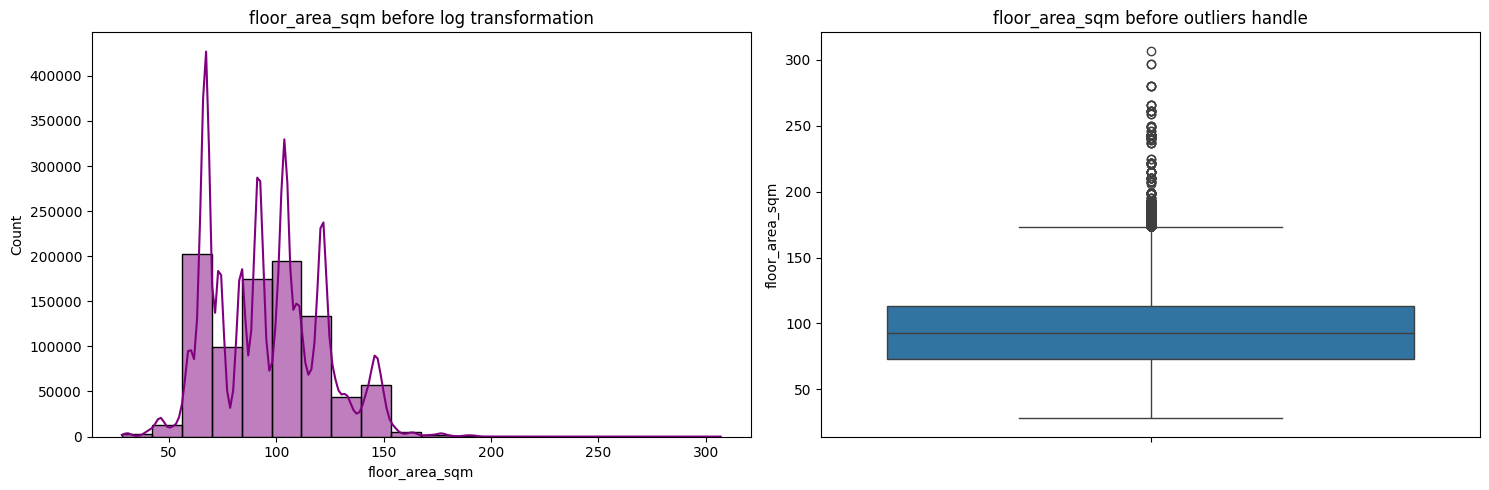

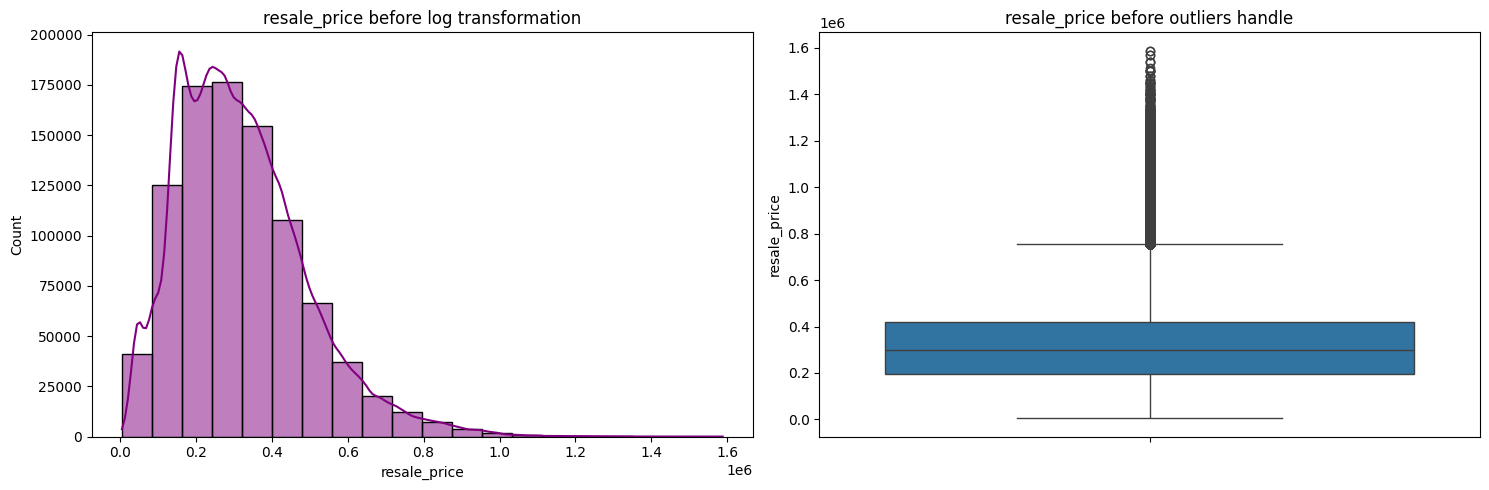

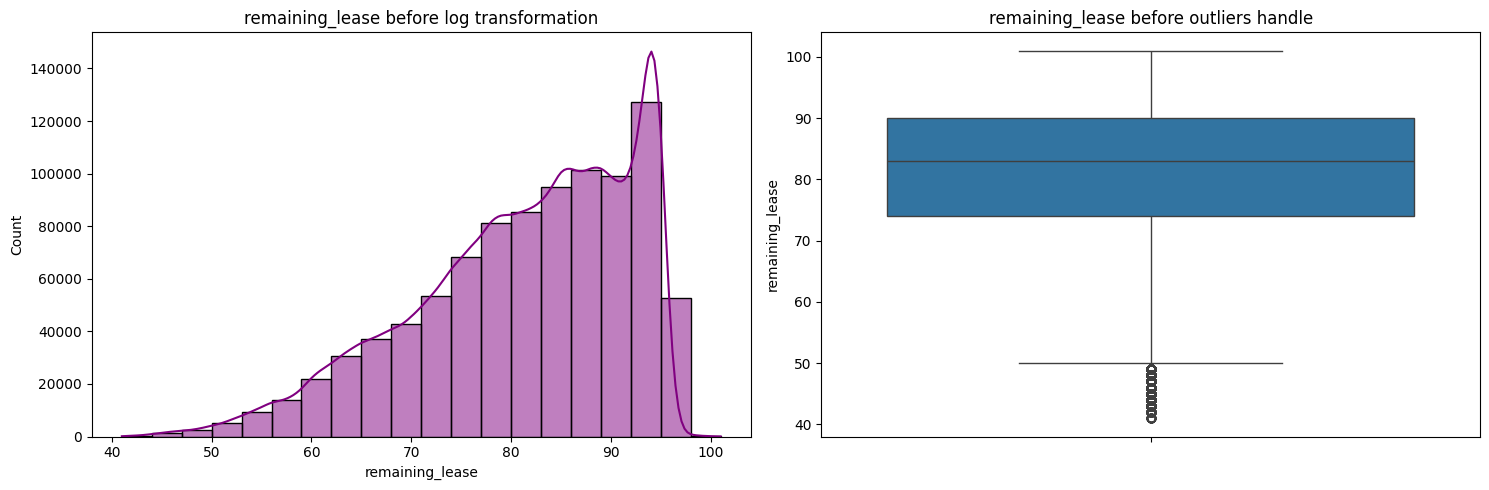

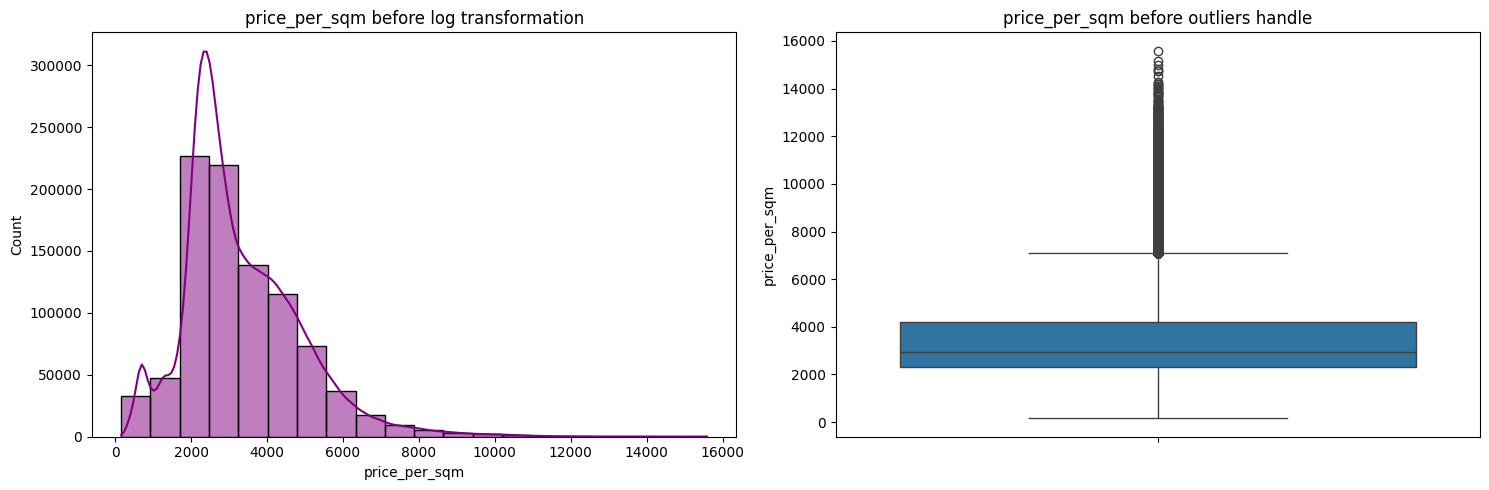

In [23]:
charts(df, col1, col2)

Function For Plotting Graphs After Outliers Handling

In [24]:
def charts2(df, col1, col2):
    for col1,col2 in zip(col1,col2):
        fig, axis = plt.subplots(1,2,figsize=(15,5))
        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axis[0],color="purple")
        axis[0].set_title(f"{col1} after log transformation")
        sns.boxplot(data=df, y=col1, ax=axis[1])
        axis[1].set_title(f"{col2} after outliers handle")
        plt.tight_layout()
        plt.show()

In [25]:
col1=["floor_area_sqm_log","resale_price_log","remaining_lease_log","price_per_sqm_log"]
col2=["floor_area_sqm","resale_price","remaining_lease","price_per_sqm"]

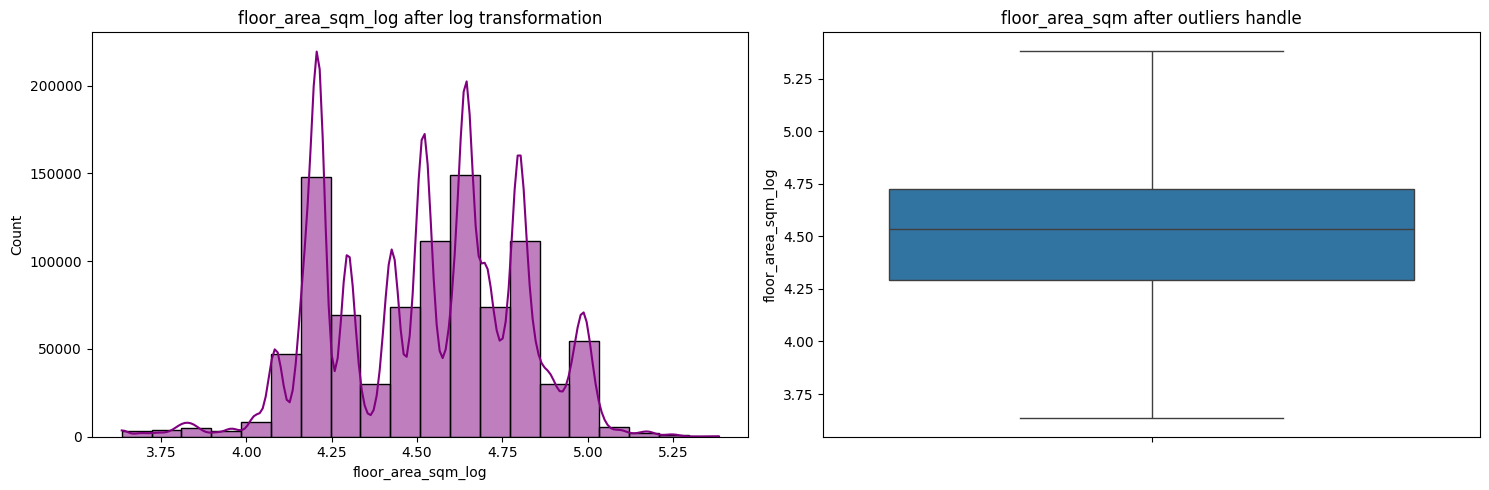

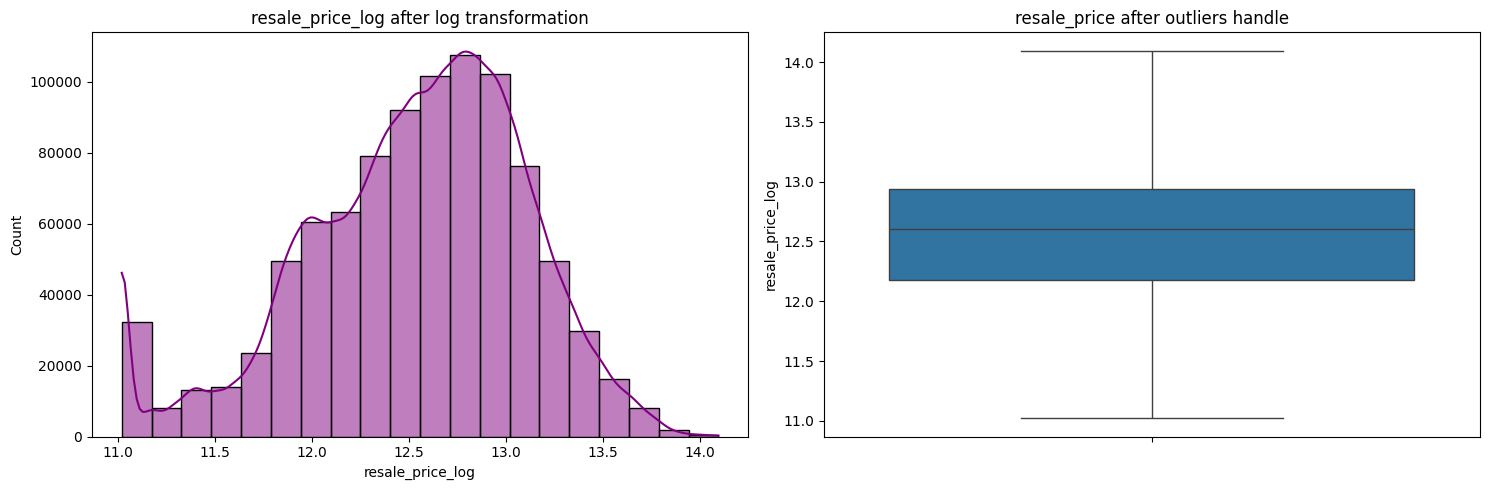

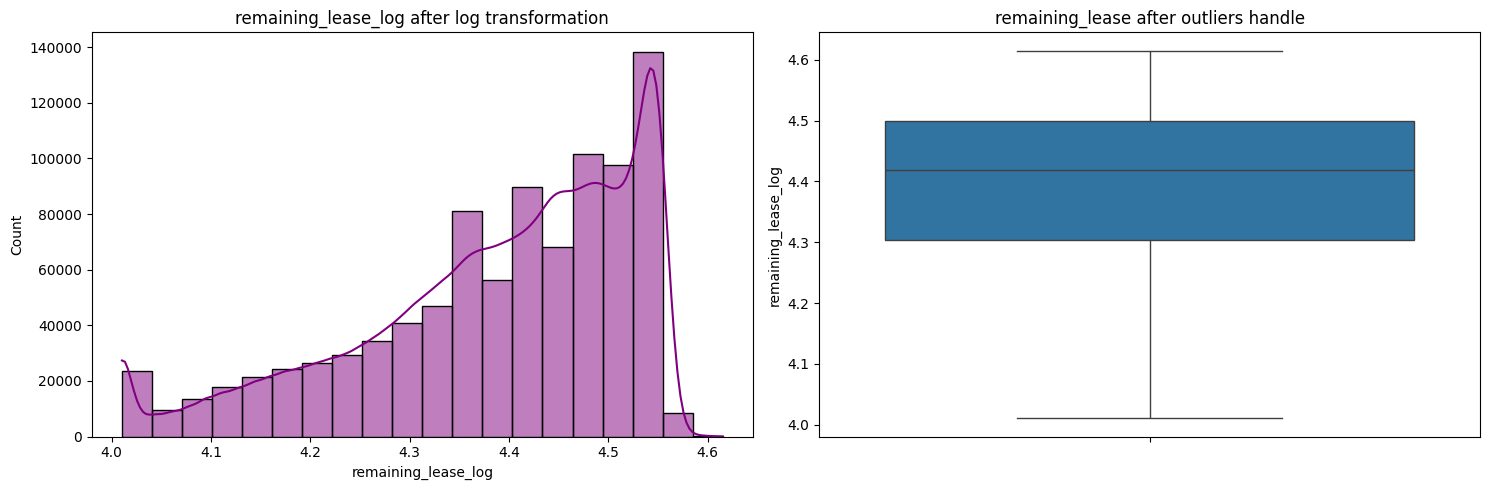

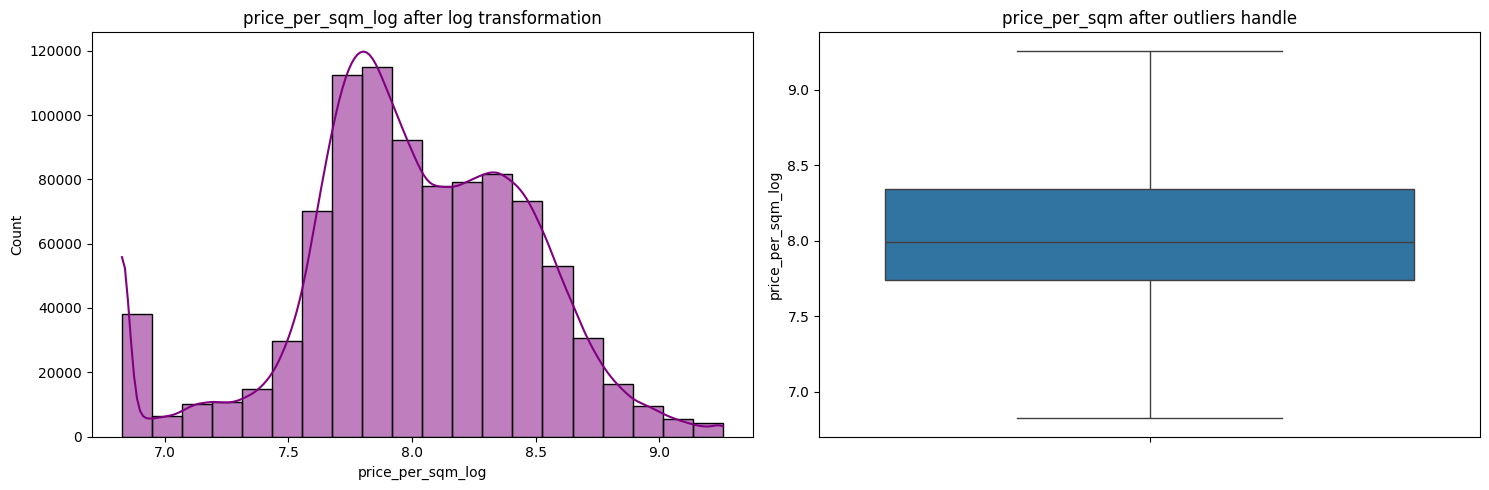

In [26]:
charts2(df, col1, col2)

Drop Unwanted & Duplicate Columns

In [27]:
df.drop(columns = ["street_name", "floor_area_sqm", "resale_price", "remaining_lease", "price_per_sqm"], inplace = True)

Correlation Result

<ipython-input-28-6f28d3ce2252>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x=target_corr.values, y=target_corr.index, palette="rocket")


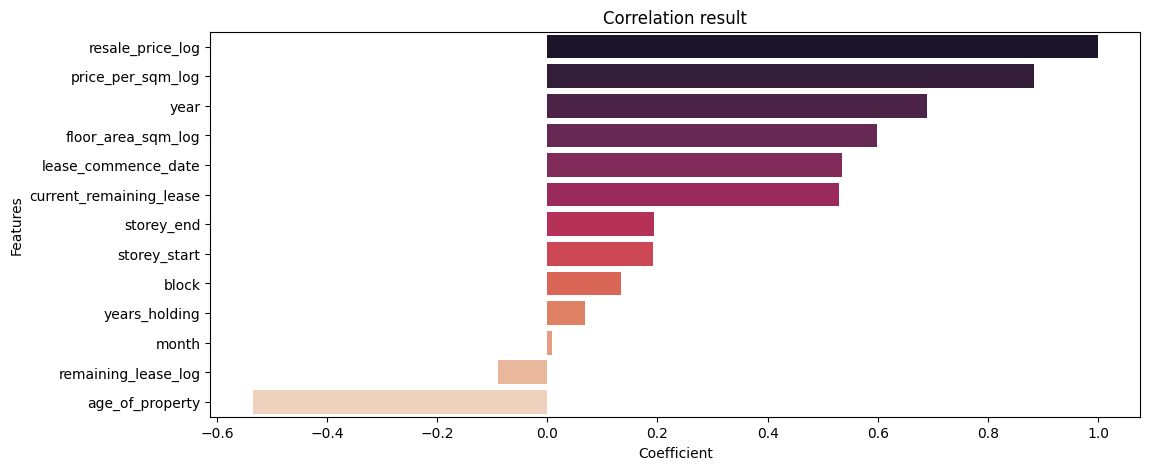

In [28]:
corr_result = df[["month", "block", "floor_area_sqm_log", "lease_commence_date", "resale_price_log", "remaining_lease_log",
               "year", "storey_start", "storey_end", "price_per_sqm_log", "years_holding", "current_remaining_lease",
               "age_of_property"]].corr()
target_corr = corr_result["resale_price_log"].sort_values(ascending = False)
plt.figure(figsize = (12, 5))
axis = sns.barplot(x=target_corr.values, y=target_corr.index, palette="rocket")
plt.title("Correlation result")
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.show()

Heatmap

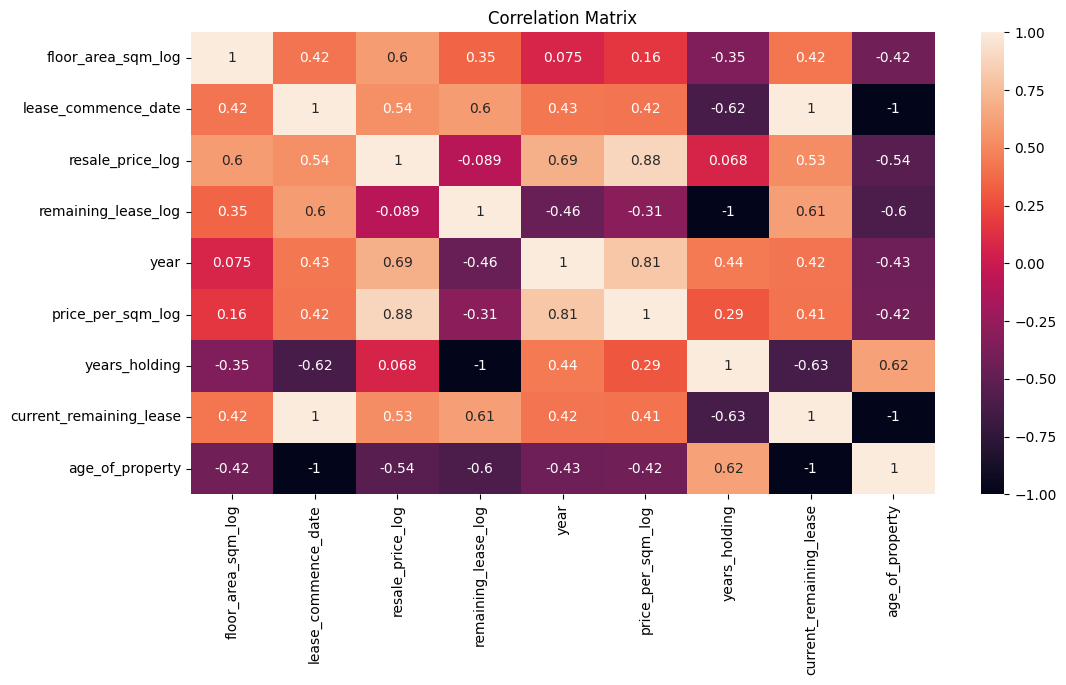

In [29]:
sel_cols = ["floor_area_sqm_log", "lease_commence_date", "resale_price_log", "remaining_lease_log",
                 "year", "price_per_sqm_log", "years_holding", "current_remaining_lease",
                 "age_of_property"]
corr_matrix = df[sel_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

Encoding For String Values

In [30]:
def encode(df, columns):
  label_encoder = LabelEncoder()
  df[columns] = label_encoder.fit_transform(df[columns])

In [31]:
encode(df, "town")

In [32]:
encode(df, "flat_type")

In [33]:
encode(df, "flat_type")
encode(df, "flat_model")

In [34]:
df[["town", "flat_type", "flat_model"]] = df[["town", "flat_type", "flat_model"]].astype("int64")

In [35]:
df

,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.021600,4.454347,6.826296
1,1,0,0,309,5,1977,1990,4,6,13,52.0,47,3.635067,11.021600,4.454347,6.826296
2,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.021600,4.454347,6.826296
3,1,0,0,309,5,1977,1990,7,9,13,52.0,47,3.635067,11.021600,4.454347,6.826296
4,1,0,2,216,12,1976,1990,4,6,14,51.0,48,4.290459,11.021600,4.442651,6.826296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929572,7,26,4,297,5,2000,2024,1,3,24,75.0,24,4.718499,13.329378,4.317488,8.610879
929573,7,26,4,755,5,1986,2024,4,6,38,61.0,38,4.804021,13.415033,4.110874,8.611012
929574,7,26,5,406,7,1988,2024,4,6,36,63.0,36,4.997212,13.630144,4.143135,8.632932
929575,7,26,5,792,3,1987,2024,7,9,37,62.0,37,4.990433,13.617060,4.127134,8.626627


Split the Data into X & Y

In [36]:
x = df.drop(["resale_price_log"], axis = 1)
y = df["resale_price_log"]

Using Machine Learning Algorithms

In [42]:
def ml_agorithms(x, y, algorithms):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
  results = {}
  for algorithm in algorithms:
    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    results[algorithm.__name__] = {'Mean Absolute Error':mae,'Mean Squared Error':mse,'Root Mean Squared Error':rmse,
                                        'R² score':r2}
  best_algorithm = max(results.items(), key=lambda x: x[1]['R² score'])[0]
  return best_algorithm, results

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]
best_algorithm, results = ml_agorithms(x, y, algorithms)
results_df = pd.DataFrame(results).T
print(results_df)
print("Best Algorithm : ", best_algorithm)

                       Mean Absolute Error  Mean Squared Error  \
LinearRegression                  0.008039            0.000935   
DecisionTreeRegressor             0.001340            0.000160   
RandomForestRegressor             0.001034            0.000085   

                       Root Mean Squared Error  R² score  
LinearRegression                      0.030580  0.997200  
DecisionTreeRegressor                 0.012640  0.999522  
RandomForestRegressor                 0.009234  0.999745  
Best Algorithm :  RandomForestRegressor


Using Decision Tree

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_rf = DecisionTreeRegressor()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0013365586576384032
Mean Squared Error: 0.00016052934831426284
Root Mean Squared Error: 0.012670017691947507
R-squared: 0.9995193277527236


Feature Scores

In [39]:
feature_scor = pd.Series(model_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scor

price_per_sqm_log          0.797550
floor_area_sqm_log         0.192044
flat_type                  0.010095
block                      0.000072
month                      0.000045
town                       0.000044
age_of_property            0.000037
storey_end                 0.000018
remaining_lease_log        0.000017
year                       0.000016
storey_start               0.000016
lease_commence_date        0.000014
years_holding              0.000013
flat_model                 0.000011
current_remaining_lease    0.000008
dtype: float64

Save The Model Using Pickle

In [40]:
with open("DecisionTree.pkl", "wb")  as file:
  pickle.dump(model_rf, file)

Sample Prediction Using Decision Tree Model

In [41]:
with open("DecisionTree.pkl", "rb") as file:
  model = pickle.load(file)
predict = model.predict(np.array([[1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,4.465908,6.828872]]))
np.exp(predict[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


61181.48431404781